# <----- Self Case Study 2 ----- Hacker Earth Competition ----->

# --------------------> Classification Of Lunar Rock <--------------------

 - _Lunar landings by renowned space stations across the world have yielded an abundance of new scientific data on the Moon. The various experiments placed on the surface provided information on seismic, gravitational, and other lunar characteristics. But perhaps the most dramatic result of the missions was returning a total of more than 800 pounds of lunar rock and soil for analysis on Earth. These samples of the Moon offered a deeper appreciation of the evolution of our nearest planetary neighbor._


 - _Imagine you have been called by one of the largest space stations in the world (XYZ) space station and you are requested to make a Machine Learning model which classifies the different rocks present on the moon's surface. The purpose of this is to make the research process a lot easier. This will reduce the human effort of doing a monotonous task. There are basically two types of rocks to be classified:_
 

 - _Small Rocks_
 - _Large Rocks_
 
 
 - _Competition link-1: https://www.hackerearth.com/challenges/competitive/lunar-rock-hackerearth-data-science-competition/_
 
 
 - _Competition Link-2: https://www.hackerearth.com/challenges/competitive/lunar-rock-hackerearth-data-science-competition/machine-learning/lunar-rock-recognition-43274e07-04533c43/_

## Mounting Google Colab with drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
# !unzip 'drive/My Drive/Lunar Rock/Train Images.zip'

In [26]:
# !unzip 'drive/My Drive/Lunar Rock/Test Images.zip'

## Taking Train Large, Train Small and Test images names in a list.

In [43]:
import os

tr_l_list = os.listdir('drive/My Drive/Lunar Rock/Train Images/Train Images/Large')

tr_s_list = os.listdir('drive/My Drive/Lunar Rock/Train Images/Train Images/Small')

te_list = os.listdir('drive/My Drive/Lunar Rock/Test Images/Test Images')

print("\n -> Number of images in train large:", len(tr_l_list))
print("\n -> Number of images in train small:", len(tr_s_list))
print("\n -> Number of images in test:", len(te_list))


 -> Number of images in train large: 5999

 -> Number of images in train small: 6000

 -> Number of images in test: 7538


## Displaying 10 Train Large images


First 10 images from train large
*********************************** 



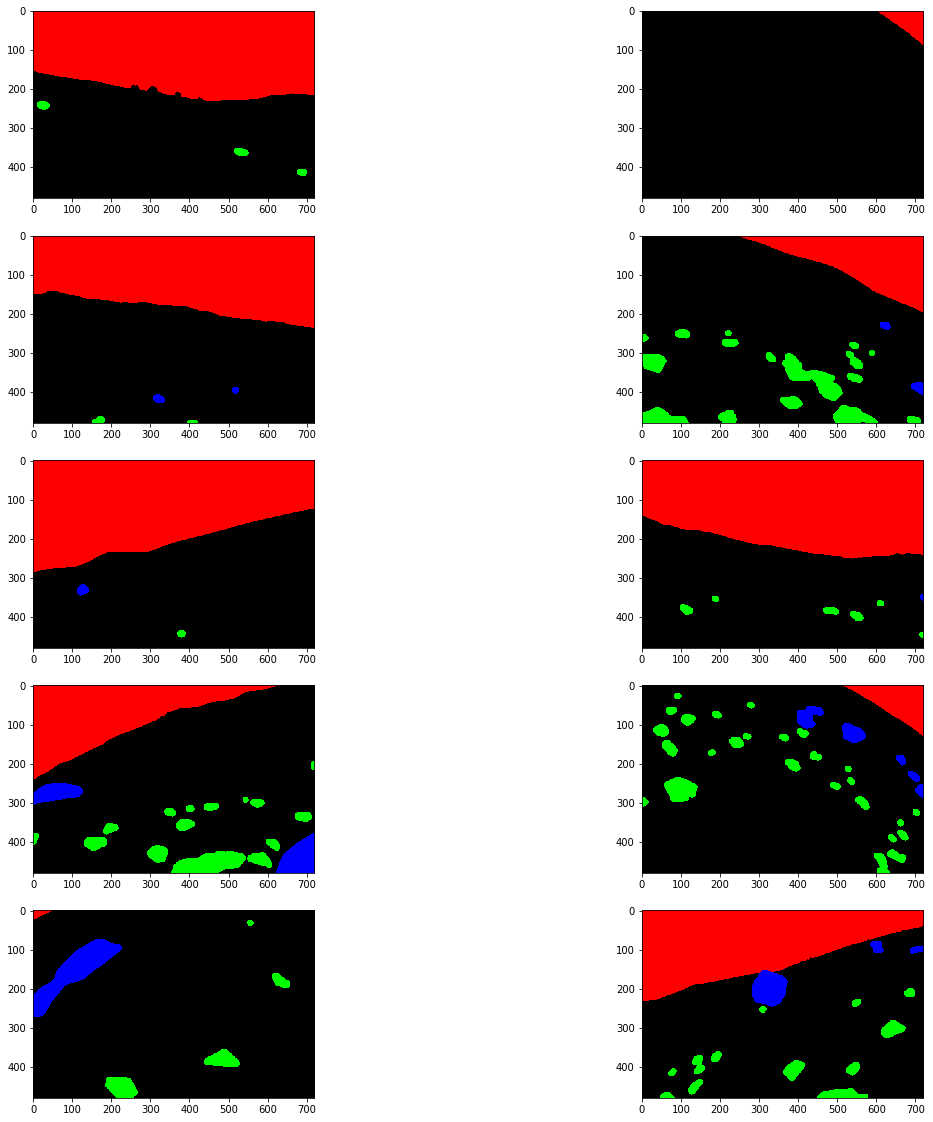

In [0]:
import cv2

print("\nFirst 10 images from train large")
print('*'*35, '\n')

fig = plt.figure(figsize=(20,20))

for i in range(1, 11):
    
    fig.add_subplot(5,2,i)
    
    read = cv2.imread('drive/My Drive/Lunar Rock/Train Images/Train Images/Large/'+tr_l_list[i])
    img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
  
plt.show()

## Displaying 10 Train Small images


First 10 images from train small
*********************************** 



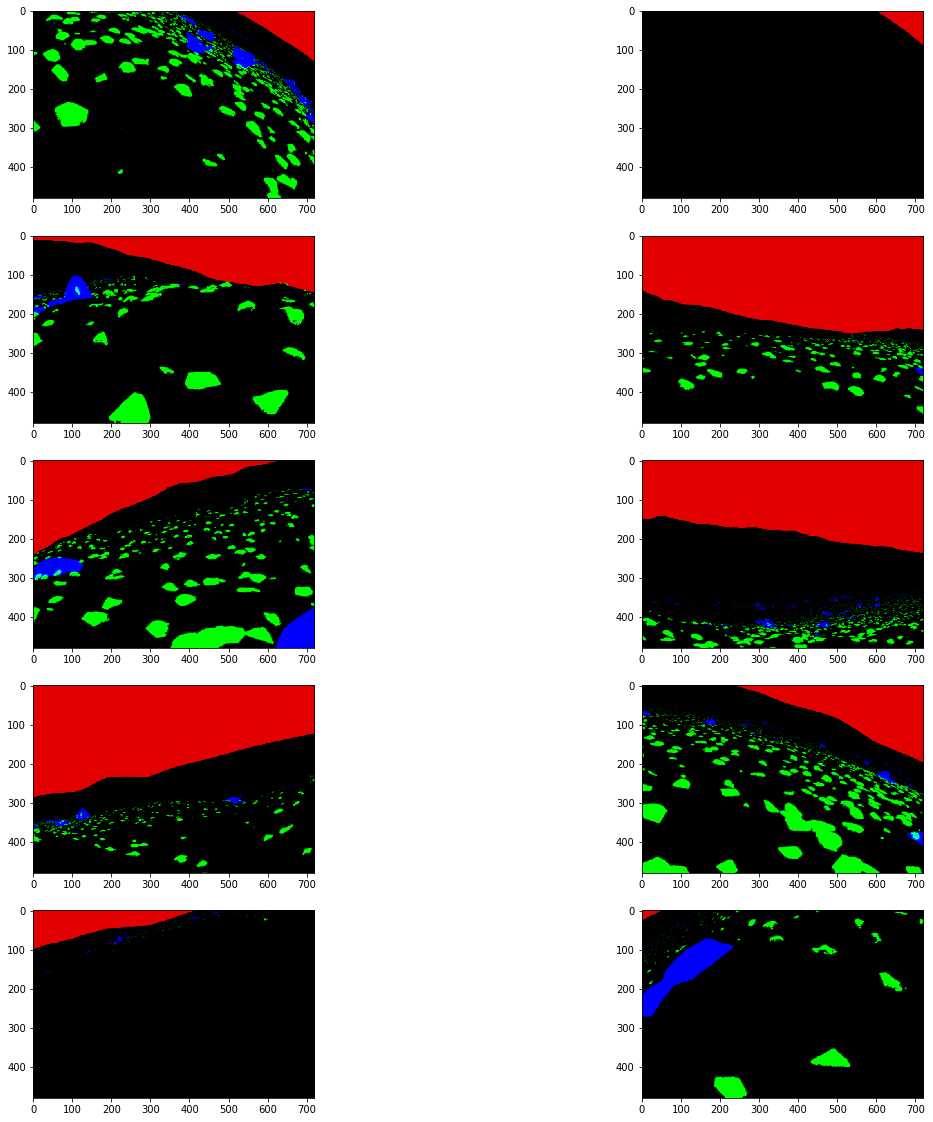

In [0]:
import cv2

print("\nFirst 10 images from train small")
print('*'*35, '\n')

fig = plt.figure(figsize=(20,20))

for i in range(1, 11):
    
    fig.add_subplot(5,2,i)
    
    read = cv2.imread('drive/My Drive/Lunar Rock/Train Images/Train Images/Small/'+tr_s_list[i])
    img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
  
plt.show()

## Importing train data

In [44]:
df = pd.read_csv('drive/My Drive/Lunar Rock/train.csv')

print("\n -> Displaying head of train dataframe.\n")

df.head()


 -> Displaying head of train dataframe.



,Image_File,Class
0,clean2416.png,Large
1,ground4022.png,Small
2,ground0340.png,Small
3,ground2110.png,Small
4,clean1581.png,Large


In [48]:
print("\n -> Shape of train data:", df.shape)
print("\n -> Number of rows in train data:", df.shape[0])
print("\n -> Number of columns in train data:", df.shape[1])
print("\n -> Number of images in train data:", df.shape[0])
print("\n -> Number of images of class Large in train data:", df.Class.value_counts()[1])
print("\n -> Number of images of class Small in train data:", df.Class.value_counts()[0])


 -> Shape of train data: (11998, 2)

 -> Number of rows in train data: 11998

 -> Number of columns in train data: 2

 -> Number of images in train data: 11998

 -> Number of images of class Large in train data: 5999

 -> Number of images of class Small in train data: 5999


In [45]:
print("\n -> Count of Large and Small class.\n")
print(df.Class.value_counts())


 -> Count of Large and Small class.

Small    5999
Large    5999
Name: Class, dtype: int64



 -> Graphically visualzing count of Large and Small class.



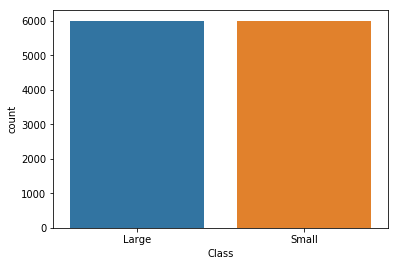

In [46]:
print("\n -> Graphically visualzing count of Large and Small class.\n")

sns.countplot(df.Class)
plt.show()

# Training Model

## Generating images from existed images

##### Generating images from existed images such as rotating by certain degree, shifting width and height by certain value, rescaling and zoom-in and zoom-out by certain value.

In [15]:
import keras

from keras.preprocessing.image import ImageDataGenerator

img_gen = ImageDataGenerator(rotation_range = 30,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            rescale = 1/255,
                            zoom_range = 0.2)

Using TensorFlow backend.


### Displaying original image from Train Large

In [0]:
import cv2

 -> Original image from Train Large



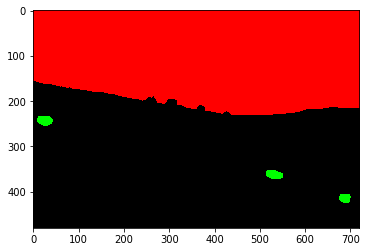

In [13]:
print(" -> Original image from Train Large\n")

re = cv2.imread('drive/My Drive/Lunar Rock/Train Images/Train Images/Large/'+tr_l_list[1])
re = cv2.cvtColor(re, cv2.COLOR_BGR2RGB)

plt.imshow(re)
plt.show()

## Displaying generated image

 -> Generated image from Train Large



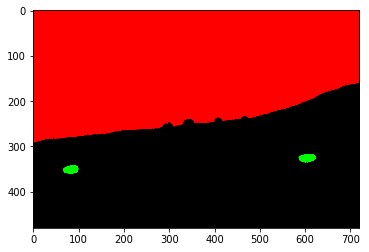

In [20]:
print(" -> Generated image from Train Large\n")

re = cv2.imread('drive/My Drive/Lunar Rock/Train Images/Train Images/Large/'+tr_l_list[1])
re = cv2.cvtColor(re, cv2.COLOR_BGR2RGB)

plt.imshow(img_gen.random_transform(re))
plt.show()

## Observation:

 - __If we compare above original image and generated image, we can clearly see the difference. Position of stone is changed and it is due to ImageGenerator by certain parameters.__

### With 'flow_from_directory' we will see the number of classes

In [21]:
print("\n -> Viewing number of classes in train data\n")

print(img_gen.flow_from_directory('drive/My Drive/Lunar Rock/Train Images/Train Images'))


 -> Viewing number of classes in train data

Found 11999 images belonging to 2 classes.


## Observation:

 - __There are 2 classes i.e Large and Small__

## Details of image

In [26]:
print("\n -> Shape of image:", re.shape)
print("\n -> Width of image:", re.shape[0])
print("\n -> Width of image:", re.shape[1])
print("\n -> Number of color channels of image:", re.shape[2])


 -> Shape of image: (480, 720, 3)

 -> Width of image: 480

 -> Width of image: 720

 -> Number of color channels of image: 3


In [0]:
input_shape = (480, 480, 3)

## Importing all required keras models

In [0]:
from keras.models import Sequential, Model

from keras import regularizers

from keras.layers import Activation, Conv2D, MaxPool2D, Dropout, Dense, Flatten

## Creating callbacks such as TensorBoard, ModelCheckpoint and EarlyStopping

In [0]:
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_2 = ModelCheckpoint("lunar_model_2.h5", monitor = "train_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_2 = EarlyStopping(monitor = 'train_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_2 = TensorBoard(log_dir = "drive/My Drive/Lunar Rock/lunar_graph_2",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_2 = [checkpoint_2, earlystop_2, tensorboard_2]

## Building Conv2d Model

 - __kernel_size - (3,3)__
 - __Activation - 'relu' and output 'sigmoid'__
 - __kernel_regularizer - regularizers.l2(0.01)__
 - __pool_size - (2,2)__
 - __Dropout - 0.3__
 - __loss - 'binary_crossentropy'__
 - __Optimizer - 'adam'__

In [0]:
import warnings
warnings.filterwarnings('ignore')


model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = input_shape, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = input_shape, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Displaying Network Architecture

Source: https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

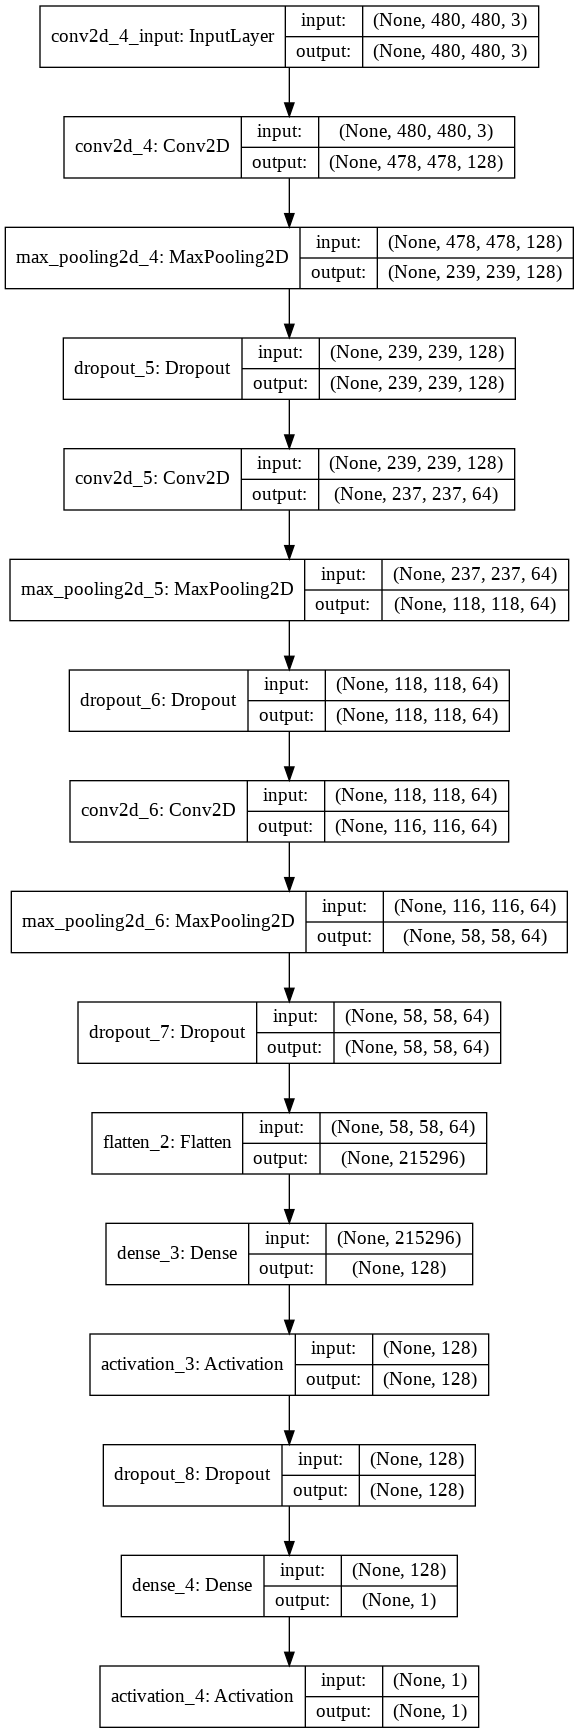

In [33]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, show_shapes = True, show_layer_names = True, to_file = 'lunar_model_1.png')

Image(retina = True, filename = 'lunar_model_1.png')

### Model Summary

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 478, 478, 128)     3584      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 239, 239, 128)     0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 239, 239, 128)     0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 237, 237, 64)      73792     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 118, 118, 64)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 118, 118, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 116, 116, 64)     

### With 'flow_from_directory', getting all Train images (Large and Small class)

In [34]:
batch_size = 16

train_img_gen = img_gen.flow_from_directory(('drive/My Drive/Lunar Rock/Train Images/Train Images'),
                                           target_size = input_shape[:2],
                                           batch_size = batch_size,
                                           class_mode = 'binary')

Found 11999 images belonging to 2 classes.


### Checking the indices of class (Large and Small)

In [37]:
print("\n -> Class indices.\n")

print(train_img_gen.class_indices)


 -> Class indices.

{'Large': 0, 'Small': 1}


## Observation:

 - __Large belongs to class - 0__
 - __Small belongs to class - 1__

## Training model with 'fit_generator'

In [0]:
import warnings
warnings.filterwarnings('ignore')

results = model.fit_generator(train_img_gen, epochs = 20, steps_per_epoch = 100, callbacks = callback_2)

Epoch 1/20
100/100 [==============================] - 475s 5s/step - loss: 1.3171 - acc: 0.7638
Epoch 2/20
100/100 [==============================] - 484s 5s/step - loss: 0.4561 - acc: 0.9519
Epoch 3/20
100/100 [==============================] - 493s 5s/step - loss: 0.2803 - acc: 0.9756
Epoch 4/20
100/100 [==============================] - 528s 5s/step - loss: 0.2588 - acc: 0.9656
Epoch 5/20
100/100 [==============================] - 484s 5s/step - loss: 0.1877 - acc: 0.9825
Epoch 6/20
100/100 [==============================] - 473s 5s/step - loss: 0.2470 - acc: 0.9650
Epoch 7/20
100/100 [==============================] - 489s 5s/step - loss: 0.1992 - acc: 0.9756
Epoch 8/20
100/100 [==============================] - 301s 3s/step - loss: 0.1687 - acc: 0.9781
Epoch 9/20
100/100 [==============================] - 118s 1s/step - loss: 0.1565 - acc: 0.9800
Epoch 10/20
100/100 [==============================] - 120s 1s/step - loss: 0.1568 - acc: 0.9787
Epoch 11/20
100/100 [==================

In [0]:
print("Original small image after resizing\n")

r = cv2.imread('drive/My Drive/Lunar Rock/Train Images/Train Images/Small/'+tr_s_list[1])
r = cv2.cvtColor(r, cv2.COLOR_BGR2RGB)
r = cv2.resize(r, (480, 480))
r = np.expand_dims(r, axis = 0)

Original small image after resizing



# Test data

### Importing test data

In [39]:
test = pd.read_csv('drive/My Drive/Lunar Rock/test.csv')

print("\n -> Displaying head of test data.\n")

test.head()


 -> Displaying head of test data.



,Image_File,Class
0,lg 988 (1).png,NaN
1,lg 988 (10).png,NaN
2,lg 988 (100).png,NaN
3,lg 988 (101).png,NaN
4,lg 988 (102).png,NaN


In [40]:
print("\n -> Shape of test data:", test.shape)
print("\n -> Number of rows in test data:", test.shape[0])
print("\n -> Number of columns in test data:", test.shape[1])
print("\n -> Number of images in test data:", test.shape[0])


 -> Shape of test data: (7534, 2)

 -> Number of rows in test data: 7534

 -> Number of columns in test data: 2

 -> Number of images in test data: 7534


## Displaying 10 test images


First 10 images from test
*********************************** 



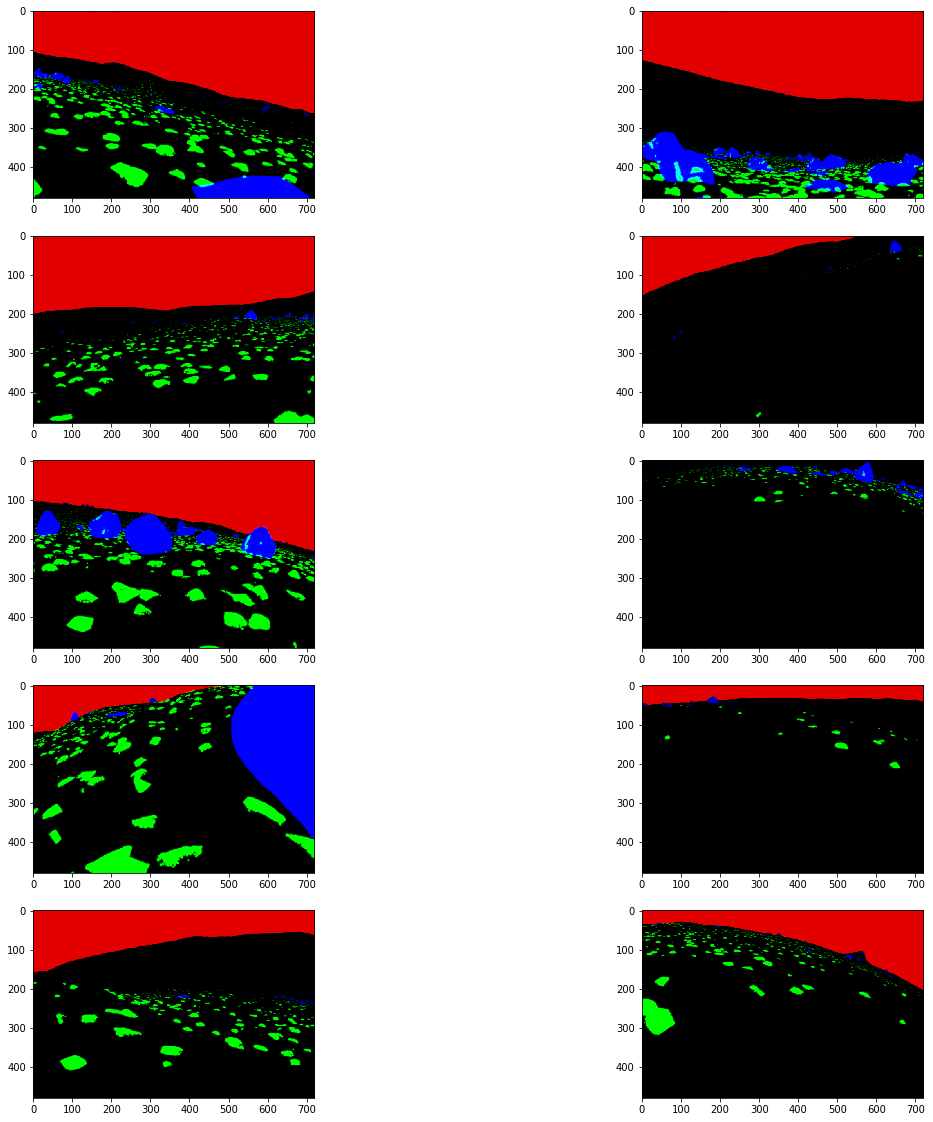

In [42]:
import cv2

print("\nFirst 10 images from test")
print('*'*35, '\n')

fig = plt.figure(figsize=(20,20))

for i in range(1, 11):
    
    fig.add_subplot(5,2,i)
    
    read = cv2.imread('drive/My Drive/Lunar Rock/Test Images/Test Images/'+te_list[i])
    img = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

plt.show()

## Storing all test image names as an array

In [0]:
test_files = np.array(test['Image_File'])

test_files[:5]

array(['lg 988 (1).png', 'lg 988 (10).png', 'lg 988 (100).png',
       'lg 988 (101).png', 'lg 988 (102).png'], dtype=object)

## Resizing all test images and storing the image array

In [0]:
test_arr = []

for i in range(len(test_files)):
    
    t = cv2.imread('drive/My Drive/Lunar Rock/Test Images/Test Images/'+test_files[i])
    t = cv2.cvtColor(t, cv2.COLOR_BGR2RGB)
    t = cv2.resize(t, (480, 480))
    t = np.expand_dims(t, axis = 0)
    t = np.array(t)
    test_arr.append(t)

## Predicting test images and storing in a list

In [0]:
predict = []

for i in range(len(test_arr)):
    
    pred = model.predict(test_arr[i])
    predict.append(pred)

In [0]:
test.head()

,Image_File,Class
0,lg 988 (1).png,NaN
1,lg 988 (10).png,NaN
2,lg 988 (100).png,NaN
3,lg 988 (101).png,NaN
4,lg 988 (102).png,NaN


In [0]:
pred_list = []

for i in range(len(predict)):
    
    pred = int(predict[i][0][0])
    pred_list.append(pred)
    
    

## Replacing 'nan' values with predicted class (1, 0)

In [0]:
test['Class'] = pred_list

## Replacing class 1 with string 'Small' and class 0 with string 'Large'

In [41]:
print("\n -> Class indices.\n")
train_img_gen.class_indices


 -> Class indices.



{'Large': 0, 'Small': 1}

In [0]:
test['Class'] = test['Class'].apply(lambda x: 'Large' if x == 0 else 'Small')

In [0]:
# test.to_csv('drive/My Drive/Lunar Rock/Lunar_Predict_2.csv', index = False)

## Displaying test score and rank in HackerEarth

- _Competition link-1: https://www.hackerearth.com/challenges/competitive/lunar-rock-hackerearth-data-science-competition/_
 
 
 - _Competition Link-2: https://www.hackerearth.com/challenges/competitive/lunar-rock-hackerearth-data-science-competition/machine-learning/lunar-rock-recognition-43274e07-04533c43/_
 

 - _Leaderboard Link: https://www.hackerearth.com/challenges/competitive/lunar-rock-hackerearth-data-science-competition/leaderboard/lunar-rock-recognition-43274e07-04533c43/_

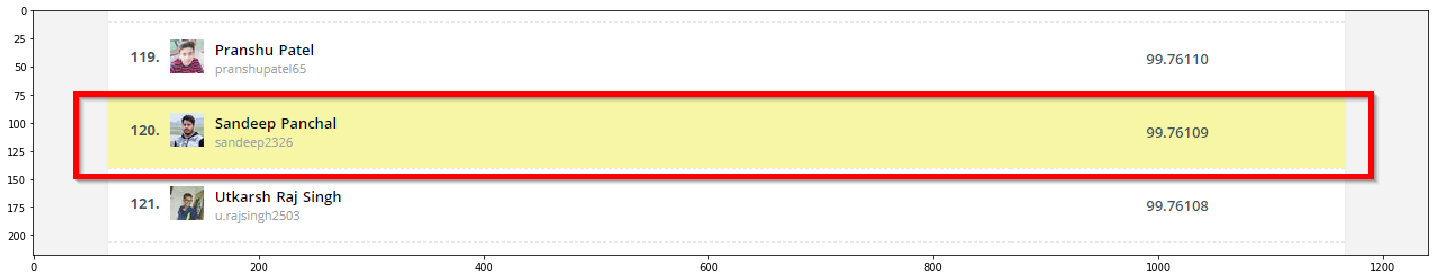

In [19]:
import cv2

plt.figure(figsize = (25,25))
rank_read = cv2.imread('Leaderboard_Lunar_Rock.png')
rank_cvt = cv2.cvtColor(rank_read, cv2.COLOR_BGR2RGB)
plt.imshow(rank_cvt)
plt.show()

## Pretty Table:

In [24]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Model', 'Metric', 'Optimizer', 'Dropout', 'Test F1-Score', 'HackerEarth Rank']

a.add_row([1, 'Conv2d', '100 * F1-Score', 'Adam', 0.3, 99.76109, 120])

print(a.get_string(title = "Classification of Lunar Rock"))

+------+--------+----------------+-----------+---------+---------------+------------------+
| S.No | Model  |     Metric     | Optimizer | Dropout | Test F1-Score | HackerEarth Rank |
+------+--------+----------------+-----------+---------+---------------+------------------+
|  1   | Conv2d | 100 * F1-Score |    Adam   |   0.3   |    99.76109   |       120        |
+------+--------+----------------+-----------+---------+---------------+------------------+


## Conclusion:

 - __Using Conv2d model, we got score of 99.76109 on test data and rank of 120 in HackerEarth.__

# Step-by-Step Procedure 

 - __Train Data Analysis and Preparation__
     - Extracted train large, train small and test images from the directory and saved in a list.
     - Displayed 10 train large images.
     - Dislayed 10 train small images.
     - Imported train.csv file.
     - Checked for shape, number of rows, columns, images and image count of 2 classes (Small and Large).
     - Graphically represented the count of 2 classes (Small and Large).
     

 - __Training Model__
 
    - Image Data Generator:
        - Generating images from existed images such as rotating by certain degree, shifting width and height by certain value, rescaling, and zoom-in & zoom-out by certain value.
        - Displayed original and generated images to check the difference between images before and after Image Data Generator.
        
    - Flow From Directory:
        - It is to import images from the directory. In addition, it will import images with classification which is based on the sub-directory files inside directory.
        - Checked the indices of class i.e Large is labelled as 0 and Small as 1.
        
    - Shape of images
        - Checked the shape of images, width, height, and number of channels.
     
    - Callback:
        - Creating callback such ModelCheckpoint, EarlyStopping, and TensorBoard.
        - ModelCheckpoint is to save the best model which further can be used in future.
        - EarlyStopping is to stop running the model if there is no improvement in score.
        - TensorBoard is visualization tool.
         
    - Convolution 2d Model (Conv2d):
        - kernel_size - (3,3)
        - Activation - 'relu' and output 'sigmoid'
        - kernel_regularizer - regularizers.l2(0.01)
        - pool_size - (2,2)
        - Dropout - 0.3
        - Loss - 'binary_crossentropy'
        - Optimizer - 'adam'
     
    - Displaying model structure using pydot
    
    - Fit Generator
        - Running model using 'fit_generator'.
        - Epochs - 20
        - Batch Size - 16
        - Steps Per Epoch - 100
        
        
 - __Test Data Analysis and Preparation__
     - Extracted test images from the directory and saved in a list.
     - Displayed 10 test images.
     - Imported train.csv file.
     - Checked for shape, number of rows, columns, and images.
     - Stored all test images names in a list of array.
     - Resizing test images and storing the array of images in an array.
 
 
 - __Test Data Prediction__
     - With above trained model, test data images are predicted.
     - Predicted values are stored in a list of array.
     - Corresponding to test data image names, predicted values are filled in dataframe.
     - In the dataframe, under Class feature, Class 0 is replaced with Large and Class 1 is replaced with Small.
     - Saved the dataframe which contains test data image id and class of image.
     
     
 - __Pretty Table__
     - Using pretty table, displayed our model performance in a tabular form.
 
 
 - __Conclusion__
     - Using Conv2d model, we got score of 99.76109 on test data and rank of 120 in HackerEarth.